In [1]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langgraph.graph import START,END,StateGraph
from dotenv import load_dotenv
from typing import TypedDict
import os

c:\Users\rijan\OneDrive\Desktop\GenAI_learnings\genai\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# loading the model
api_key=os.getenv('GOOGLE_API_KEY')
model=ChatGoogleGenerativeAI(model='gemini-2.5-flash-lite-preview-09-2025',temperature=0.2,api_key=api_key)

In [4]:
class BlogState(TypedDict):
    title:str
    outline:str
    blog:str

In [16]:
def generate_outline(state:BlogState)->BlogState:
    topic=state['title']
    prompt=f"Generate a detailed outline for a blog post on the topic {topic}"
    result=model.invoke(prompt)
    state['outline']=result.content
    return state

In [17]:
def generate_blog(state:BlogState)->BlogState:
    outline=state['outline']
    topic=state['title']
    prompt=f'Generate me a blog on the following {topic} using the following outline {outline}'
    blog=model.invoke(prompt)
    state['blog']=blog.content
    return state

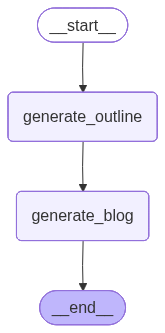

In [18]:
# create a graph
graph=StateGraph(BlogState)

# add the nodes
graph.add_node('generate_outline',generate_outline)
graph.add_node('generate_blog',generate_blog)

# add the edges
graph.add_edge(START,'generate_outline')
graph.add_edge('generate_outline','generate_blog')
graph.add_edge('generate_blog',END)

# complie the graph
workflow=graph.compile()
workflow

In [19]:
initial_state={'title':'Impact of AI in the modern Economy.'}
final_state=workflow.invoke(initial_state)

In [20]:
final_state['blog']

'# The AI Revolution: Reshaping the Landscape of the Modern Economy\n\n## I. Introduction (Setting the Stage)\n\nThe pace of technological change has never been faster. Just a few years ago, Artificial Intelligence (AI) was largely confined to research labs and niche applications. Today, breakthroughs like large language models (LLMs) such as GPT-4 are not just impressive feats of engineering; they are seismic events reshaping how value is created, distributed, and consumed globally.\n\nWhat we mean by **AI in the modern economy** has evolved far beyond simple factory automation. We are now witnessing AI systems capable of complex reasoning, creative generation, sophisticated data synthesis, and autonomous decision-making across finance, healthcare, and creative industries.\n\n**Our central argument is this:** AI is not merely an incremental improvement to existing systems; it represents a fundamental structural shift. This shift promises unprecedented productivity gains and the birth 

In [22]:
final_state['outline']

'## Blog Post Outline: The Transformative Impact of AI on the Modern Economy\n\n**Title Options (Choose One):**\n\n* **The AI Revolution: Reshaping the Landscape of the Modern Economy**\n* **Beyond Automation: Understanding the Profound Impact of Artificial Intelligence on Global Economics**\n* **From Efficiency to Disruption: Navigating the Economic Tides of Artificial Intelligence**\n\n---\n\n### I. Introduction (Setting the Stage)\n\n**A. Hook:** Start with a compelling statistic, a recent major AI breakthrough (e.g., GPT-4, advanced robotics), or a provocative statement about the speed of technological change.\n\n**B. Definition & Context:** Briefly define what "AI in the modern economy" means (moving beyond simple automation to complex decision-making, data analysis, and generative capabilities).\n\n**C. Thesis Statement:** Clearly state the blog\'s main argument (e.g., "AI is not just an incremental improvement but a fundamental structural shift, driving unprecedented productivit